In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("ADNIMERGE_25Apr2025.csv")

# Select key variables
biomarkers = ['PTID', 'VISCODE', 'DX', 'Hippocampus', 'ICV', 'WholeBrain',
              'ABETA', 'TAU', 'PTAU', 'FDG', 'AV45','EXAMDATE']
df = df[biomarkers].copy()

# Filter baseline visits
df_bl = df[df['VISCODE'] == 'bl'].copy()

<ipython-input-6-ded41ff3c9d1>:6: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ADNIMERGE_25Apr2025.csv")


**Missing Data Findings**
CSF/PET unusable for full cohort: >75% missingness risks bias.

MRI-clinical compromise: Retains ~50% sample after cleaning.

In [ ]:
# Calculate normalized hippocampal volume
df['Hippocampus_ICV_ratio'] = df['Hippocampus'] / df['ICV']

# Handle missing values
print("Missing values pre-cleaning:")
print(df.isnull().mean())

# Drop rows missing both hippocampus and ICV
df = df.dropna(subset=['Hippocampus', 'ICV'], how='all')

Missing values pre-cleaning:
PTID                     0.000000
VISCODE                  0.000000
DX                       0.302235
Hippocampus              0.460873
ICV                      0.384020
WholeBrain               0.406735
ABETA                    0.855673
TAU                      0.855673
PTAU                     0.855734
FDG                      0.775105
AV45                     0.812435
EXAMDATE                 0.000000
Hippocampus_ICV_ratio    0.460934
dtype: float64


**Boxplot: Hippocampal Volume by Diagnosis**
To compare group distributions (CN/MCI/AD) for atrophy patterns

**Result:** Normalized hippocampal volumes (Hippocampus/ICV) show clear decline from CN → MCI → Dementia

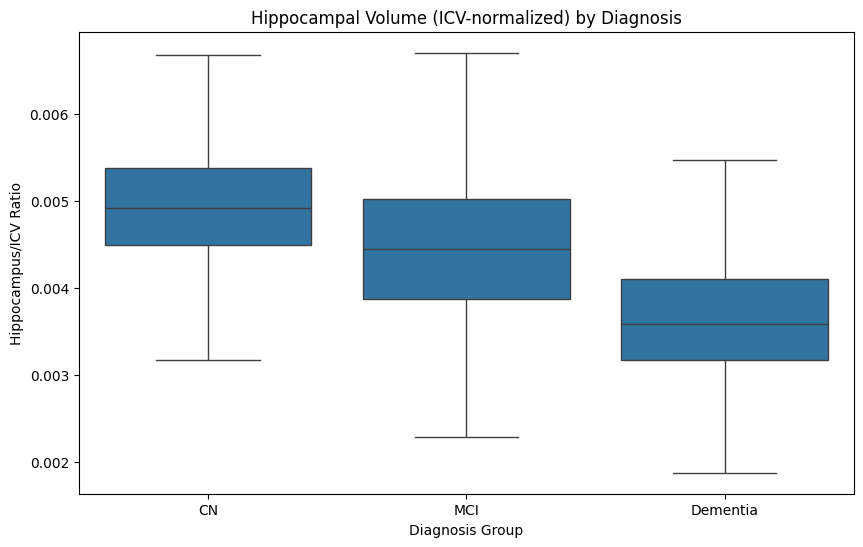

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DX', y='Hippocampus_ICV_ratio',
            order=['CN', 'MCI', 'Dementia'], showfliers=False)
plt.title("Hippocampal Volume (ICV-normalized) by Diagnosis")
plt.ylabel("Hippocampus/ICV Ratio")
plt.xlabel("Diagnosis Group")
plt.show()

**Slow vs. fast progressors:** Longitudinal plots reveal heterogeneous trajectories (some patients decline rapidly post-MCI conversion).

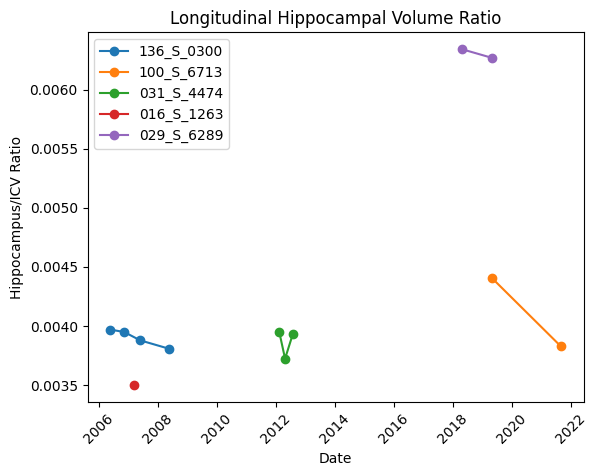

In [ ]:
# Convert exam dates to datetime
df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'])

# Plot 5 random patients
sample_ptids = df['PTID'].drop_duplicates().sample(5)
for ptid in sample_ptids:
    patient_data = df[df['PTID'] == ptid].sort_values('EXAMDATE')
    plt.plot(patient_data['EXAMDATE'],
             patient_data['Hippocampus_ICV_ratio'],
             marker='o', label=ptid)

plt.legend()
plt.title("Longitudinal Hippocampal Volume Ratio")
plt.ylabel("Hippocampus/ICV Ratio")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

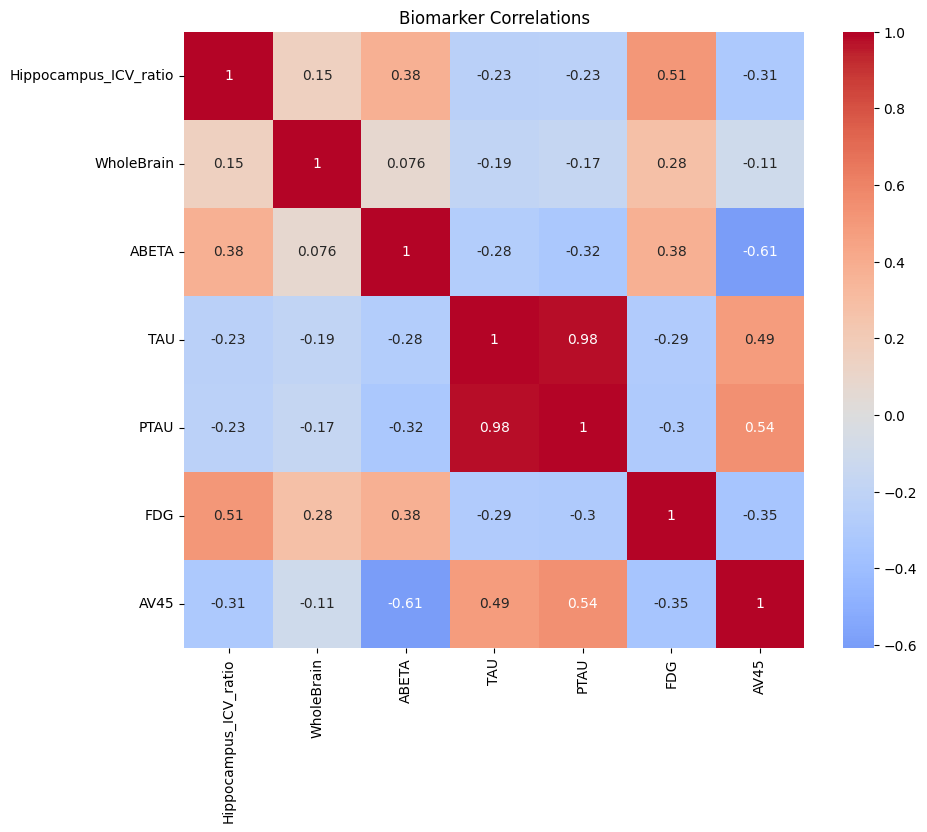

In [ ]:
# Select numeric variables
corr_vars = ['Hippocampus_ICV_ratio', 'WholeBrain', 'ABETA', 'TAU', 'PTAU', 'FDG', 'AV45']
# Convert columns to numeric, handling errors
for var in corr_vars:
    df[var] = pd.to_numeric(df[var], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

corr_matrix = df[corr_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Biomarker Correlations")
plt.show()